<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

# Chapter 1
The helper functions are a module, activate env and install with pip:

```
source activate datacamp
pip install dc_stat_think
```

In [21]:
# data prep
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from urllib.request import urlretrieve
url = 'https://assets.datacamp.com/production/repositories/1067/datasets/8885c23f1c156149b736ca2ea0d9b01bbc727ecd/'
file = 'gandhi_et_al_bouts.csv'
urlretrieve(url+file, file)

df = pd.read_csv(file, skiprows=4)
df.info()

bout_lengths_wt = df.loc[df['genotype']=='wt', 'bout_length']
bout_lengths_mut = df.loc[df['genotype']=='mut', 'bout_length']
bout_lengths_het = df.loc[df['genotype']=='het', 'bout_length']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5475 entries, 0 to 5474
Data columns (total 3 columns):
genotype       5475 non-null object
bout_length    5475 non-null float64
fish           5475 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 128.4+ KB


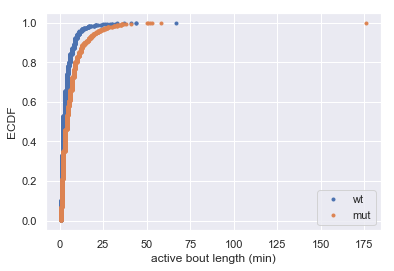

In [8]:
# Import the dc_stat_think module as dcst
import dc_stat_think as dcst

# Generate x and y values for plotting ECDFs
x_wt, y_wt = dcst.ecdf(bout_lengths_wt)
x_mut, y_mut = dcst.ecdf(bout_lengths_mut)

# Plot the ECDFs
_ = plt.plot(x_wt, y_wt, marker='.', linestyle='none')
_ = plt.plot(x_mut, y_mut, marker='.', linestyle='none')

# Make a legend, label axes, and show plot
_ = plt.legend(('wt', 'mut'))
_ = plt.xlabel('active bout length (min)')
_ = plt.ylabel('ECDF')
plt.show()


In [12]:
# Compute mean active bout length
mean_wt = np.mean(bout_lengths_wt)
mean_mut = np.mean(bout_lengths_mut)

# Draw bootstrap replicates
bs_reps_wt = dcst.draw_bs_reps(bout_lengths_wt, np.mean, size=10000)
bs_reps_mut = dcst.draw_bs_reps(bout_lengths_mut, np.mean, size=10000)

# Compute 95% confidence intervals
conf_int_wt = np.percentile(bs_reps_wt, [2.5, 97.5])
conf_int_mut = np.percentile(bs_reps_mut, [2.5, 97.5])

# Print the results
print("""
wt:  mean = {0:.3f} min., conf. int. = [{1:.1f}, {2:.1f}] min.
mut: mean = {3:.3f} min., conf. int. = [{4:.1f}, {5:.1f}] min.
""".format(mean_wt, *conf_int_wt, mean_mut, *conf_int_mut))


wt:  mean = 3.874 min., conf. int. = [3.6, 4.1] min.
mut: mean = 6.543 min., conf. int. = [6.1, 7.0] min.



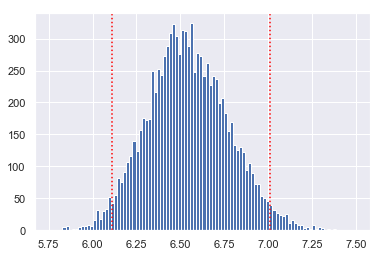

In [20]:
# extra visualisation
plt.hist(bs_reps_mut, bins=100)
plt.axvline(conf_int_mut[0], color='red', linestyle=':')
plt.axvline(conf_int_mut[1], color='red', linestyle=':')
plt.show()

In [28]:
# Compute the difference of means: diff_means_exp
diff_means_exp = np.mean(bout_lengths_het) - np.mean(bout_lengths_wt)

# Draw permutation replicates: perm_reps
perm_reps = dcst.draw_perm_reps(bout_lengths_het, bout_lengths_wt, 
                               dcst.diff_of_means, size=10000)

# Compute the p-value: p-val
p_val = np.sum(perm_reps >= diff_means_exp) / len(perm_reps)

# Print the result
print('p =', p_val)

p = 0.001


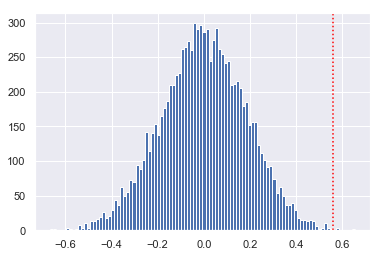

In [29]:
# extra visualisation
plt.hist(perm_reps, bins=100)
plt.axvline(diff_means_exp, color='red', linestyle=':')
plt.show()

In [33]:
# Concatenate arrays: bout_lengths_concat
bout_lengths_concat = np.concatenate((bout_lengths_wt, bout_lengths_het))

# Compute mean of all bout_lengths: mean_bout_length
mean_bout_length = np.mean(bout_lengths_concat)

# Generate shifted arrays
wt_shifted = bout_lengths_wt - np.mean(bout_lengths_wt) + mean_bout_length
het_shifted = bout_lengths_het - np.mean(bout_lengths_het) + mean_bout_length

# Compute 10,000 bootstrap replicates from shifted arrays
bs_reps_wt = dcst.draw_bs_reps(wt_shifted, np.mean, size=10000)
bs_reps_het = dcst.draw_bs_reps(het_shifted, np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_reps = bs_reps_het - bs_reps_wt

# Compute and print p-value: p
p = np.sum(bs_reps >= diff_means_exp) / len(bs_reps)
print('p-value =', p)

p-value = 0.0005


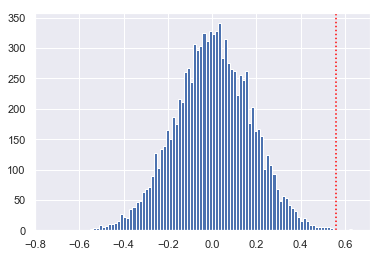

In [34]:
# extra visualisation
plt.hist(bs_reps, bins=100)
plt.axvline(diff_means_exp, color='red', linestyle=':')
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 2 columns):
bacterial area (sq. microns)    55 non-null float64
time (hr)                       55 non-null float64
dtypes: float64(2)
memory usage: 960.0 bytes


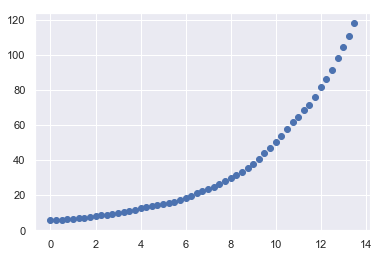

In [40]:
# data prep
url = 'https://assets.datacamp.com/production/repositories/1067/datasets/8c69b496a875ae9597a4962269baae2ceab341f0/'
file = 'park_bacterial_growth.csv'
urlretrieve(url+file, file)
df = pd.read_csv(file, skiprows=2)
df.info()

t = df['time (hr)'].values
bac_area = df['bacterial area (sq. microns)'].values

plt.scatter(t, bac_area)
plt.show()

In [42]:
# Compute logarithm of the bacterial area: log_bac_area
log_bac_area = np.log(bac_area)

# Compute the slope and intercept: growth_rate, log_a0
growth_rate, log_a0 = np.polyfit(t, log_bac_area, 1)

# Draw 10,000 pairs bootstrap replicates: growth_rate_bs_reps, log_a0_bs_reps
growth_rate_bs_reps, log_a0_bs_reps = \
            dcst.draw_bs_pairs_linreg(t, log_bac_area, size=10000)
    
# Compute confidence intervals: growth_rate_conf_int
growth_rate_conf_int = np.percentile(growth_rate_bs_reps, [2.5, 97.5])

# Print the result to the screen
print("""
Growth rate: {0:.4f} sq. µm/hour
95% conf int: [{1:.4f}, {2:.4f}] sq. µm/hour
""".format(growth_rate, *growth_rate_conf_int))


Growth rate: 0.2301 sq. µm/hour
95% conf int: [0.2267, 0.2337] sq. µm/hour



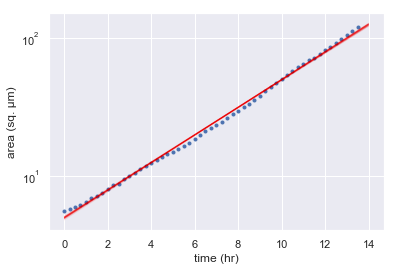

In [47]:
# Plot data points in a semilog-y plot with axis labeles
_ = plt.semilogy(t, bac_area, marker='.', linestyle='none')

# Generate x-values for the bootstrap lines: t_bs
t_bs = np.array([0, 14])

# Plot the first 100 bootstrap lines
for i in range(100):
    y = np.exp(t_bs * growth_rate_bs_reps[i] + log_a0_bs_reps[i])
    _ = plt.semilogy(t_bs, y, linewidth=0.5, alpha=0.05, color='red')
    
# Label axes and show plot
_ = plt.xlabel('time (hr)')
_ = plt.ylabel('area (sq. µm)')
plt.show()
